In [1]:
import pandas as pd
import re


df = pd.read_csv("Real-estate.csv")
df.columns = df.columns.str.replace(r'^X\d+\s*', '', regex=True)
df.head()
df.columns
df.drop(['No', 'transaction date',],axis=1, inplace=True)

In [2]:


df.head()
df["house age"] = df["house age"].astype(int)/12
df["distance to the nearest MRT station"] = df["distance to the nearest MRT station"].astype(int)/1000

df

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,Y house price of unit area
0,2.666667,0.084,10,24.98298,121.54024,37.9
1,1.583333,0.306,9,24.98034,121.53951,42.2
2,1.083333,0.561,5,24.98746,121.54391,47.3
3,1.083333,0.561,5,24.98746,121.54391,54.8
4,0.416667,0.390,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,1.083333,4.082,0,24.94155,121.50381,15.4
410,0.416667,0.090,9,24.97433,121.54310,50.0
411,1.500000,0.390,7,24.97923,121.53986,40.6
412,0.666667,0.104,5,24.96674,121.54067,52.5


In [3]:
x = df.drop(["Y house price of unit area"],axis=1)
y=df["Y house price of unit area"]

In [4]:
df.corr()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,Y house price of unit area
house age,1.000000,0.024794,0.048855,0.053732,-0.048504,-0.210376
distance to the nearest MRT station,0.024794,1.000000,-0.602527,-0.591074,-0.806332,-0.673628
number of convenience stores,0.048855,-0.602527,1.000000,0.444143,0.449099,0.571005
latitude,0.053732,-0.591074,0.444143,1.000000,0.412924,0.546307
longitude,-0.048504,-0.806332,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.210376,-0.673628,0.571005,0.546307,0.523287,1.000000


In [5]:
q1=df['Y house price of unit area'].quantile(0.25)

q3=df['Y house price of unit area'].quantile(0.75)

iqr = q3-q1

lowerbnd = q1-1.5 * iqr
upperbnd = q3+1.5 * iqr

outliers = df[(df['Y house price of unit area']< lowerbnd) |(df['Y house price of unit area']> upperbnd) ]
outliers






df = df.drop(outliers.index)

In [6]:
Q1=df['number of convenience stores'].quantile(0.25)

Q3=df['number of convenience stores'].quantile(0.75)

iQr = Q3-Q1

print(iQr)

lowerbnd1 = Q1-1.5 * iQr
upperbnd1 = Q3+1.5 * iQr

outliers1 = df[(df['number of convenience stores']< lowerbnd1) |(df['number of convenience stores']> upperbnd1) ]
print(outliers1)

5.0
Empty DataFrame
Columns: [house age, distance to the nearest MRT station, number of convenience stores, latitude, longitude, Y house price of unit area]
Index: []


<Axes: title={'center': 'longitude vs Price'}, xlabel='longitude', ylabel='Y house price of unit area'>

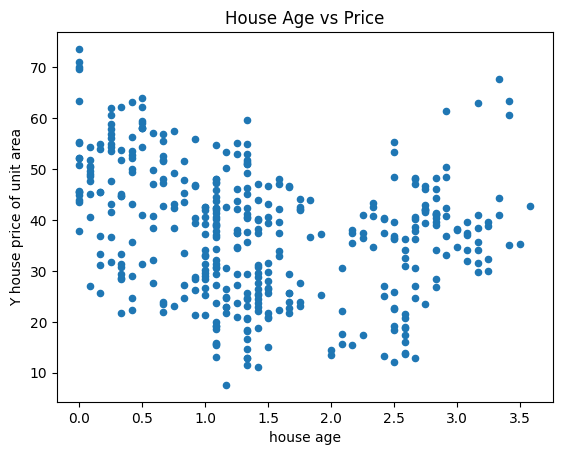

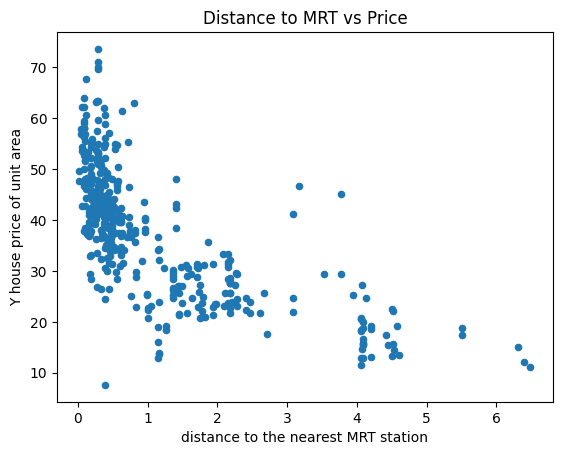

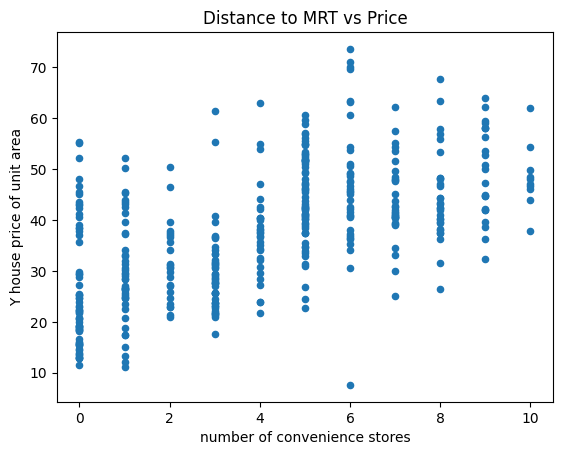

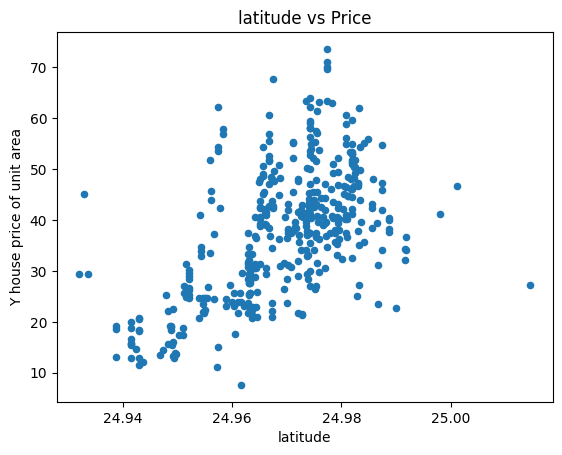

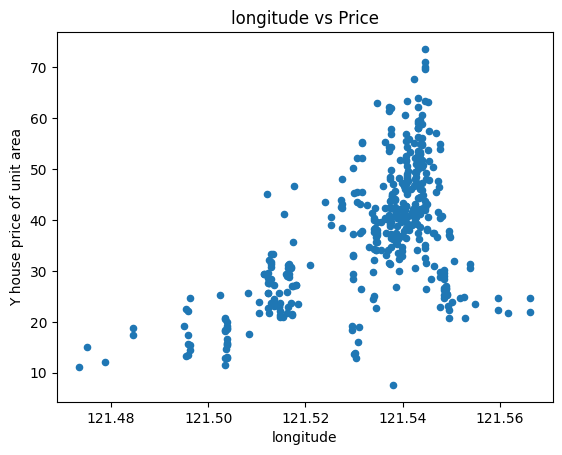

In [7]:
# Relation between house age and price
df.plot(kind="scatter", x="house age", y="Y house price of unit area", title="House Age vs Price")

# Relation between distance to MRT and price
df.plot(kind="scatter", x="distance to the nearest MRT station", y="Y house price of unit area", title="Distance to MRT vs Price")
df.plot(kind="scatter", x="number of convenience stores", y="Y house price of unit area", title="Distance to MRT vs Price")
df.plot(kind="scatter", x="latitude", y="Y house price of unit area", title="latitude vs Price")
df.plot(kind="scatter", x="longitude", y="Y house price of unit area", title="longitude vs Price")


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

mlr = LinearRegression()

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=69)

mlr.fit(x_train,y_train)
y_pred = mlr.predict(x_train)

print(r2_score(y_train,y_pred))

0.5736603011875663


In [9]:
yPredTest = mlr.predict(x_test)


print(r2_score(y_test,yPredTest))

0.5401389056177813


In [10]:
import joblib

# Save your model
joblib.dump(mlr, 'linear_model.pkl')


['linear_model.pkl']

In [11]:
model = joblib.load('linear_model.pkl')
